In [1]:
!pip install pandas==1.2.4
!pip install unidecode

     |████████████████████████████████| 9.9 MB 5.0 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.2.4 which is incompatible.


     |████████████████████████████████| 241 kB 4.8 MB/s 


In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

In [3]:
sns.set()

In [ ]:
#Descargar datasets desde github
!git clone https://github.com/andres-soto-h/monografia-udea-eacd.git

Cloning into 'monografia-udea-eacd'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (5/5), done.


In [ ]:
#Lectura del dataset transformado
df_propiedades=pd.read_csv('/content/monografia-udea-eacd/df_prop_clean.csv', delimiter=';', encoding='latin1')

## **Generalidades de la información**

In [ ]:
df_propiedades.shape

(2478, 190)

**Tipo de Propiedad**

In [ ]:
df_propiedades['inmuebles']=1
data = df_propiedades.groupby("tipo_propiedad")['inmuebles'].sum()

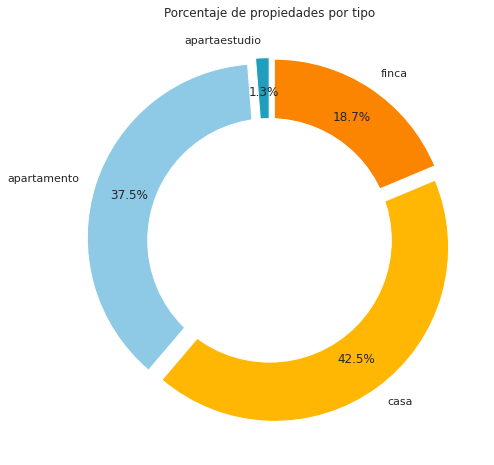

In [ ]:
# Pie chart
colors = ['#219EBC','#8ECAE6','#FFB703','#FB8500']
explode = (0.05,0.05,0.05,0.05)
 
plt.figure(figsize=(10,8))
plt.pie(list(data), colors = colors, labels=list(data.index), autopct='%1.1f%%', startangle=90, pctdistance=0.8, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# ax1.xaxis.label.set_color('white')
# ax1.axis('equal')  
plt.title("Porcentaje de propiedades por tipo");
plt.show()

**Cantidad de propiedades por municipio**

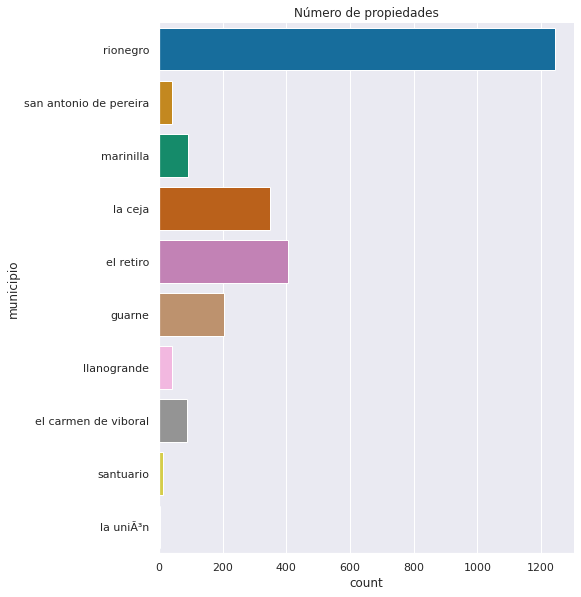

In [ ]:
sns.catplot(y="municipio", kind="count", palette="colorblind",  data=df_propiedades, height=8)
plt.title("Número de propiedades");

In [ ]:
df_propiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Columns: 191 entries, tipo to inmuebles
dtypes: float64(179), int64(1), object(11)
memory usage: 3.6+ MB


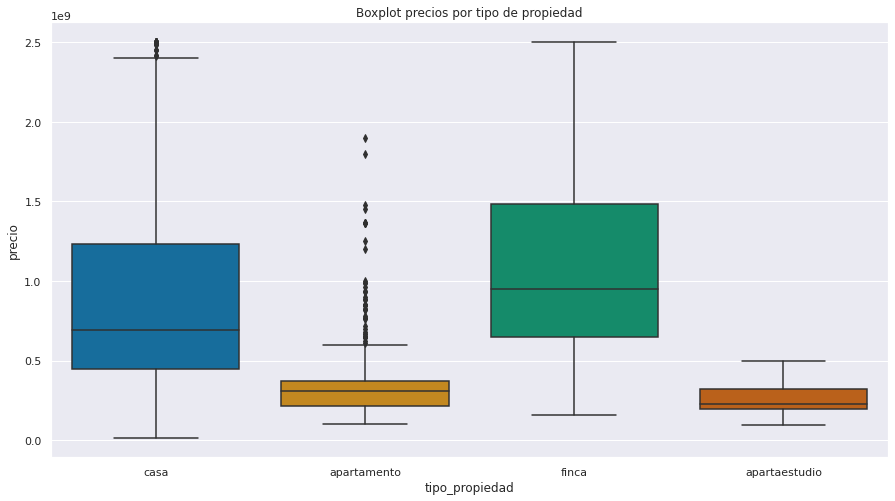

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="tipo_propiedad", y="precio", data=df_propiedades, palette="colorblind")
plt.title("Boxplot precios por tipo de propiedad");

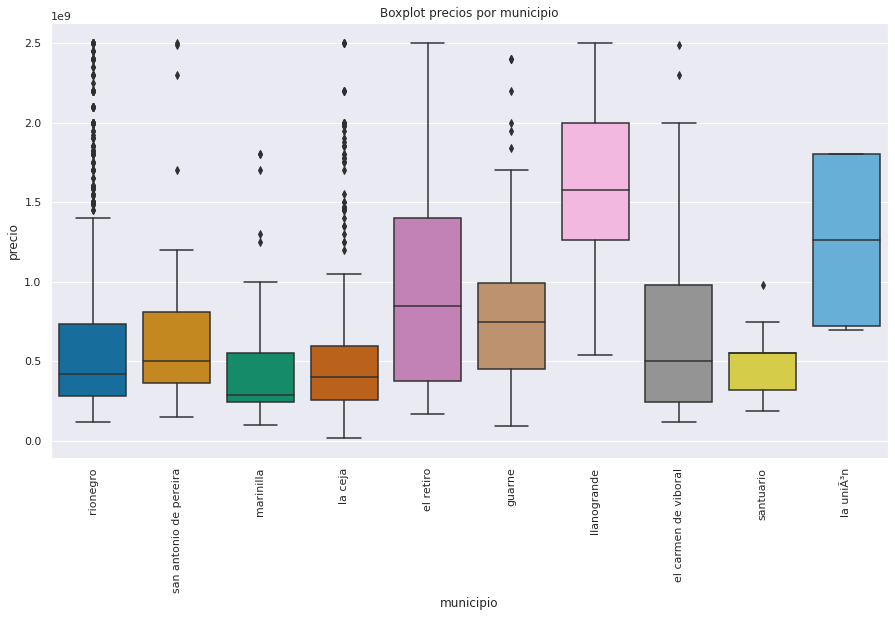

In [ ]:
plt.figure(figsize=(15,8))

ax = sns.boxplot(x="municipio", y="precio", data=df_propiedades, palette="colorblind")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Boxplot precios por municipio");

## **Modelamiento**

In [ ]:
# Crear copia del dataframe y quitar columnas que no estarán en el modelo
data_model=df_propiedades.copy()
#columnas_quitar=['tipo','url','titulo','descripcion','caractint','caractext','caractsec']
columnas_quitar=['url','titulo','descripcion','caractint','caractext','caractsec']
data_model.drop(columnas_quitar, axis=1, inplace=True)
data_model.shape

(2478, 185)

In [ ]:
# #Crear copia del dataframe y quitar columnas que no estarán en el modelo
# data_model=df_propiedades.copy()
# #columnas_quitar=['tipo','url','titulo','descripcion','caractint','caractext','caractsec']
# columnas = ['tipo','precio', 'area_m2','habitaciones','banos','garajes','estrato','antiguedad','tipo_propiedad','municipio']
# data_model = data_model[columnas]
# data_model.shape

In [ ]:
# Separar los datos en las variables dependiente e independientes
X = data_model.drop('precio', axis=1)
y = data_model['precio']

In [ ]:
# Realizar transformación sobre las variables categoricas para incluirlas en la regresión
X = pd.get_dummies(X, columns=['tipo','tipo_propiedad','municipio','antiguedad','estrato'], prefix=["estado","tipo","muni","antig","estrato"] )

In [ ]:
#Realizar división de los datos en entrenamiento y prueba (Se toma un 20% de los datos para test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(1982, 209)

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

### **Métrica**

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### **Ajuste del Modelo**

#### **Regresión Ridge**

In [ ]:
#Entrenar modelo ridge
model1 = Ridge(solver='lsqr')
model1.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='lsqr', tol=0.001)

In [ ]:
print("The model training score is" , model1.score(X_train, y_train))
print("The model test score is" , model1.score(X_test, y_test))

The model training score is 0.7272633483495042
The model test score is 0.598383924044364


In [ ]:
# Generar métrica del modelo con base en predicciones en entrenamiento y test
MAPE_train = mean_absolute_percentage_error(y_train, model1.predict(X_train))
MAPE_test = mean_absolute_percentage_error(y_test, model1.predict(X_test))
print("The model training MAPE is" , MAPE_train)
print("The model test MAPE is" , MAPE_test)

The model training MAPE is 38.948292432213194
The model test MAPE is 42.59542438588769


#### **Árbol de Decisión**

In [ ]:
# Entrenar arbol de decisión
model2 = DecisionTreeRegressor(random_state=0, max_depth=10, max_features=10)
model2.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
print("The model training score is" , model2.score(X_train, y_train))
print("The model test score is" , model2.score(X_test, y_test))

The model training score is 0.718061336104854
The model test score is 0.3511717273041254


In [ ]:
# Generar métrica del modelo con base en predicciones en entrenamiento y test
MAPE_train = mean_absolute_percentage_error(y_train, model2.predict(X_train))
MAPE_test = mean_absolute_percentage_error(y_test, model2.predict(X_test))
print("The model training MAPE is" , MAPE_train)
print("The model test MAPE is" , MAPE_test)

The model training MAPE is 33.8409431057603
The model test MAPE is 47.698635611074245


#### **Random Forest**

In [ ]:
#Entrenar modelo random forest
model3 = RandomForestRegressor(max_depth=10, random_state=0)
model3.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
print("The model training score is" , model3.score(X_train, y_train))
print("The model test score is" , model3.score(X_test, y_test))

The model training score is 0.9380033026876499
The model test score is 0.6806378242853823


In [ ]:
# Generar métrica del modelo con base en predicciones en entrenamiento y test
MAPE_train = mean_absolute_percentage_error(y_train, model3.predict(X_train))
MAPE_test = mean_absolute_percentage_error(y_test, model3.predict(X_test))
print("The model training MAPE is" , MAPE_train)
print("The model test MAPE is" , MAPE_test)

The model training MAPE is 15.562733478318064
The model test MAPE is 26.40055856282884


**Búsqueda de Hiperparámetros**

In [ ]:
#Entrenar modelo random forest con búsqueda de hyperparámetros
parameters = {'n_estimators':[20, 50, 100,110,120,150], 'max_depth':[10,20,30,40]}
rf = RandomForestRegressor(max_depth=10, random_state=0)
clf = GridSearchCV(rf, parameters, n_jobs=4, verbose=8)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    7.8s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   34.9s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:  2.9min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=10,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [ ]:
modelo4 = clf.best_estimator_

In [ ]:
print("The model training score is" , modelo4.score(X_train, y_train))
print("The model test score is" , modelo4.score(X_test, y_test))

The model training score is 0.9697211280104324
The model test score is 0.691877651291513


In [ ]:
# Generar métrica del modelo con base en predicciones en entrenamiento y test
MAPE_train = mean_absolute_percentage_error(y_train, modelo4.predict(X_train))
MAPE_test = mean_absolute_percentage_error(y_test, modelo4.predict(X_test))
print("The model training MAPE is" , MAPE_train)
print("The model test MAPE is" , MAPE_test)

The model training MAPE is 9.124766514668046
The model test MAPE is 24.9614413982915
